In [3]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
import yfinance as yf
import datetime
import pandas_datareader.data as web

# Define date range
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data for Apple stock

data = yf.download(["AAPL", "MSFT","AMZN","GOOG"], start,end)#this gives u the data det of the given compiny in the list

# Display the fetched data
data.head()#this is how u get stock prices

[*********************100%***********************]  4 of 4 completed


Price        Adj Close                                         Close  \
Ticker            AAPL       AMZN       GOOG        MSFT        AAPL   
Date                                                                   
2023-01-03  123.768456  85.820000  89.378853  235.711716  125.070000   
2023-01-04  125.045036  85.139999  88.392403  225.400925  126.360001   
2023-01-05  123.718979  83.120003  86.459343  218.720535  125.019997   
2023-01-06  128.271088  86.080002  87.844368  221.298233  129.619995   
2023-01-09  128.795578  87.360001  88.482071  223.452881  130.149994   

Price                                               High             ...  \
Ticker           AMZN       GOOG        MSFT        AAPL       AMZN  ...   
Date                                                                 ...   
2023-01-03  85.820000  89.699997  239.580002  130.899994  86.959999  ...   
2023-01-04  85.139999  88.709999  229.100006  128.660004  86.980003  ...   
2023-01-05  83.120003  86.769997  222.309998  127.769997  85.419998  ...   
2023-01-06  86.080002  88.160004  224.929993  130.289993  86.400002  ...   
2023-01-09  87.360001  88.800003  227.119995  133.410004  89.480003  ...   

Price             Low                    Open                        \
Ticker           GOOG        MSFT        AAPL       AMZN       GOOG   
Date                                                                  
2023-01-03  89.019997  237.399994  130.279999  85.459999  89.830002   
2023-01-04  87.800003  225.960007  126.889999  86.550003  91.010002   
2023-01-05  86.559998  221.759995  127.129997  85.330002  88.070000   
2023-01-06  85.570000  219.350006  126.010002  83.029999  87.360001   
2023-01-09  88.580002  226.410004  130.470001  87.459999  89.195000   

Price                      Volume                                
Ticker            MSFT       AAPL      AMZN      GOOG      MSFT  
Date                                                             
2023-01-03  243.080002  112117500  76706000  20738500  25740000  
2023-01-04  232.279999   89113600  68885100  27046500  50623400  
2023-01-05  227.199997   80962700  67930800  23136100  39585600  
2023-01-06  223.000000   87754700  83303400  26612600  43613600  
2023-01-09  226.449997   70790800  65266100  22996700  27369800  

[5 rows x 24 columns]

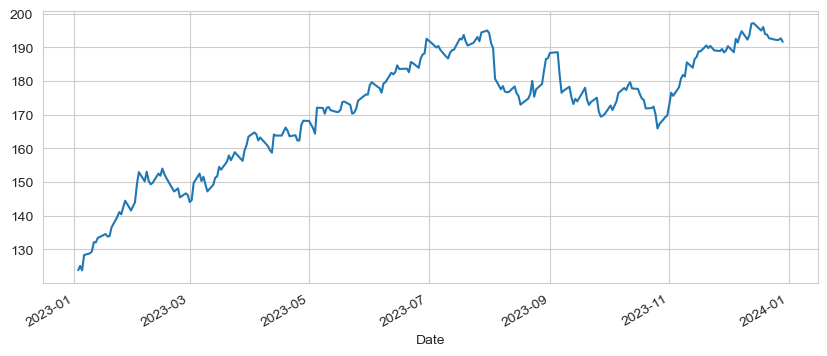

In [6]:
data['Adj Close']['AAPL'].plot(legend=False,figsize=(10,4))#this gives u the colsing price of the apple stock
plt.show()

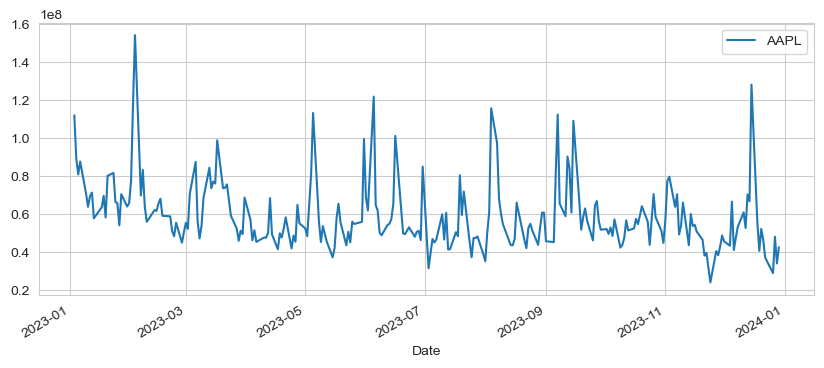

In [7]:
data['Volume']['AAPL'].plot(legend=True,figsize=(10,4))
plt.show()
                            

In [8]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name = f"ma for {ma} days"
    data[column_name] = data['Adj Close']['AAPL'].rolling(window=ma).mean()

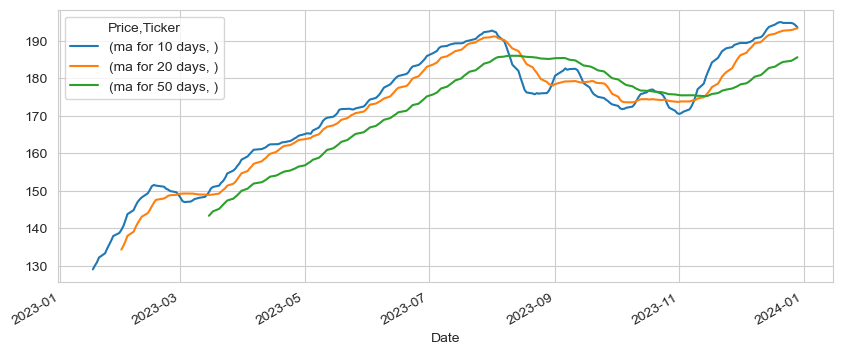

In [9]:
data[['ma for 10 days', 'ma for 20 days', 'ma for 50 days']].plot(subplots=False, figsize=(10, 4))
plt.show()



In [10]:
data['Daily_return']=data['Adj Close']['AAPL'].pct_change()#for apple stock

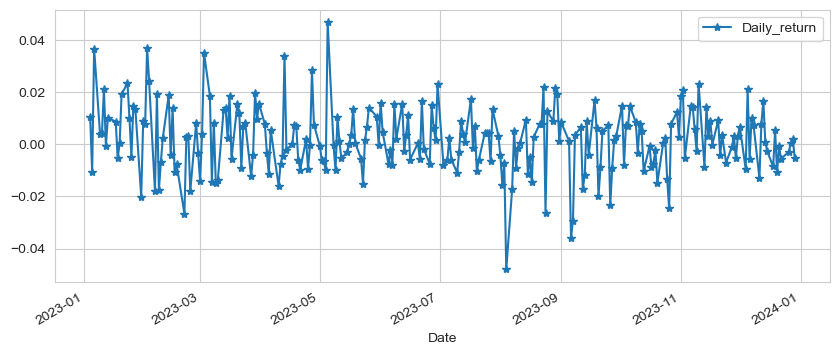

In [11]:
data['Daily_return'].plot(figsize=(10,4),legend=True,marker="*")
plt.show()

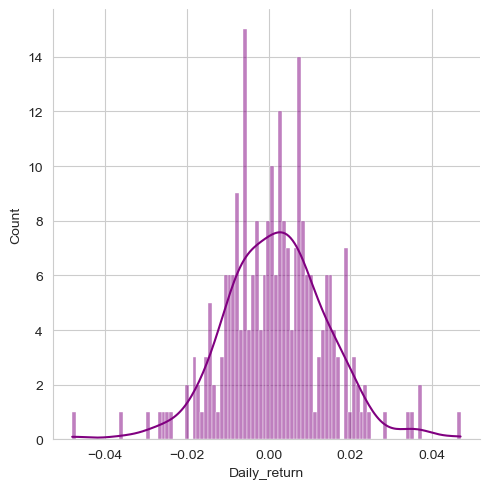

In [12]:
sns.displot(data['Daily_return'].dropna(),bins=100,color='purple',kde=True)#this plot helps in ploting 2 type of plot one over the other here it is histogrsm and normal curve
plt.show()

In [13]:
closing_df=yf.download(["AAPL", "MSFT","AMZN","GOOG"],start,end)['Adj Close']#this gives all the closiing value of each compiny in the form of data base
closing_df

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03,123.768456,85.820000,89.378853,235.711716
2023-01-04,125.045036,85.139999,88.392403,225.400925
2023-01-05,123.718979,83.120003,86.459343,218.720535
2023-01-06,128.271088,86.080002,87.844368,221.298233
2023-01-09,128.795578,87.360001,88.482071,223.452881
...,...,...,...,...
2023-12-22,192.656174,153.419998,142.209030,371.799713
2023-12-26,192.108871,153.410004,142.308670,371.879120
2023-12-27,192.208359,153.339996,140.933624,371.293518


In [14]:
tech_rets=closing_df.pct_change()# ,pct_change conveerts the value into percentage change
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.010314,-0.007924,-0.011037,-0.043743
2023-01-05,-0.010605,-0.023726,-0.021869,-0.029638
2023-01-06,0.036794,0.035611,0.016019,0.011785
2023-01-09,0.004089,0.014870,0.007259,0.009736


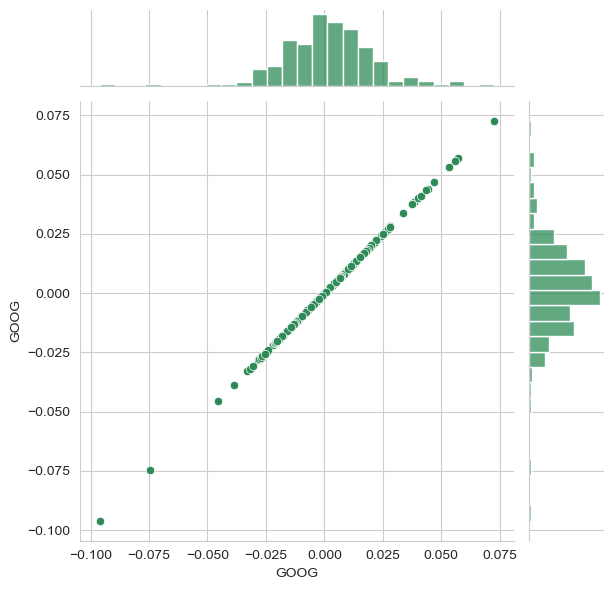

In [15]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')
plt.show()

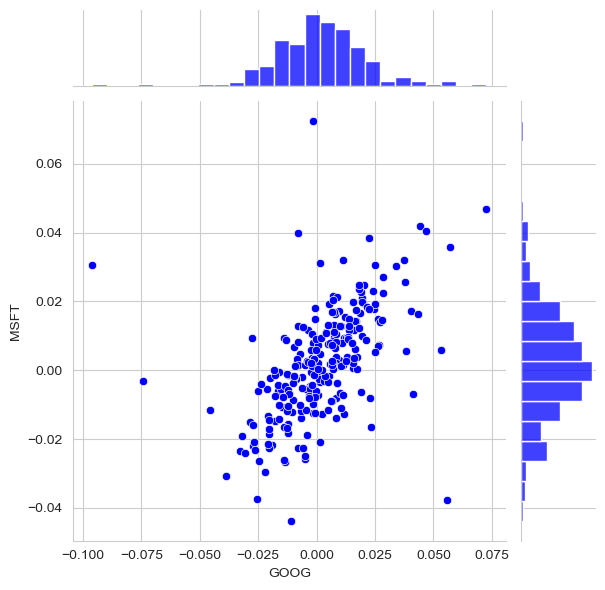

In [16]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='blue') #joint plot helps in seeing the correlation
plt.show()

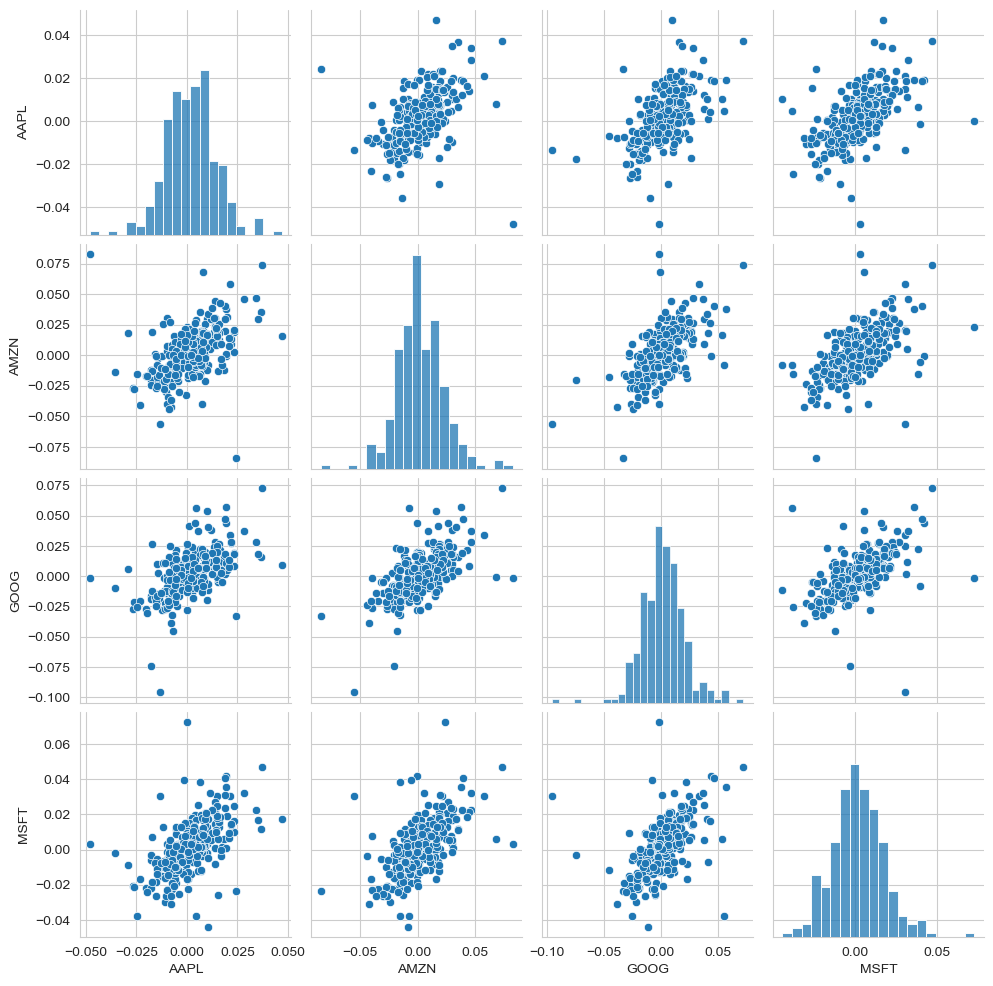

In [17]:
sns.pairplot(data=tech_rets.dropna()) #this gives all the possible corelation between all posible combination of stocks
plt.show()

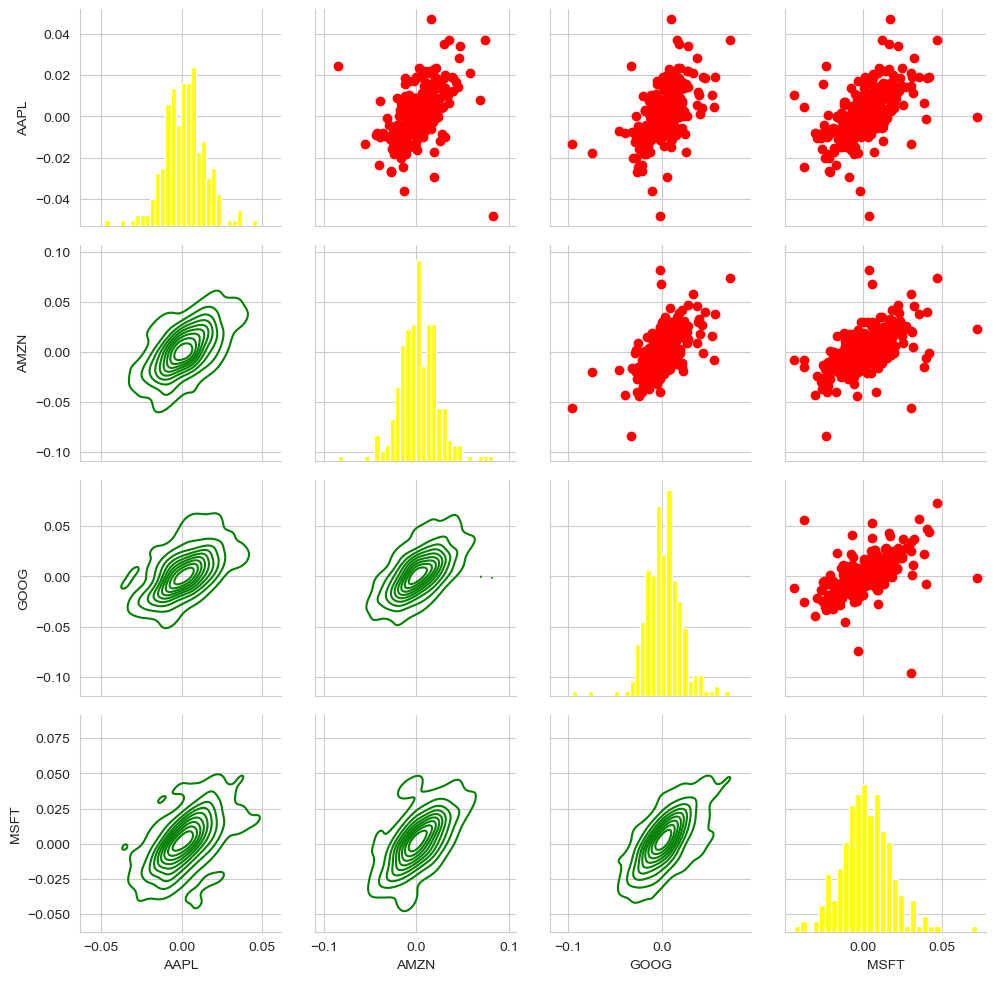

In [18]:
returns_fig=sns.PairGrid(data=tech_rets.dropna())#this forms pair of grid 
returns_fig.map_upper(plt.scatter,color='red')#upper trisngle has scatter plot
returns_fig.map_diag(plt.hist,bins=30,color='yellow')#diagonal has histogram
returns_fig.map_lower(sns.kdeplot,color='green')#lower triangle has kdeplot
plt.show()

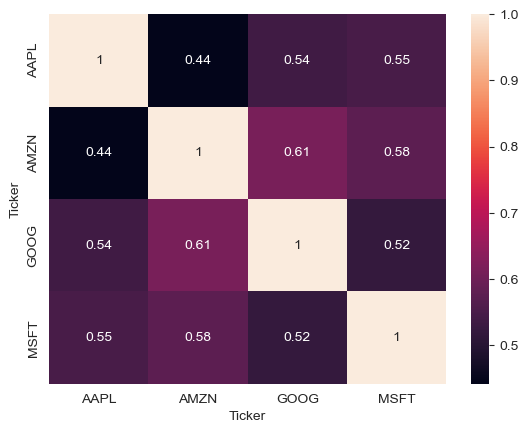

In [19]:
sns.heatmap(data=tech_rets.dropna().corr(),annot=True) #this gives the techreturns coorelation in the form of heat map.to get correlation syntax data=dataframe.corr()
plt.show()

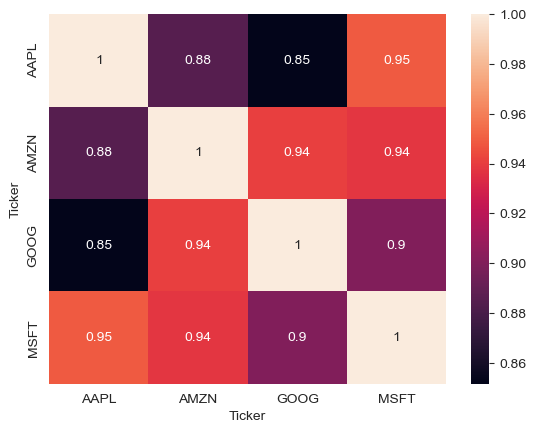

In [20]:
sns.heatmap(data=closing_df.dropna().corr(),annot=True)# below graph tells that there is a very heighe co relation of closing prices for apple and microsft
plt.show()

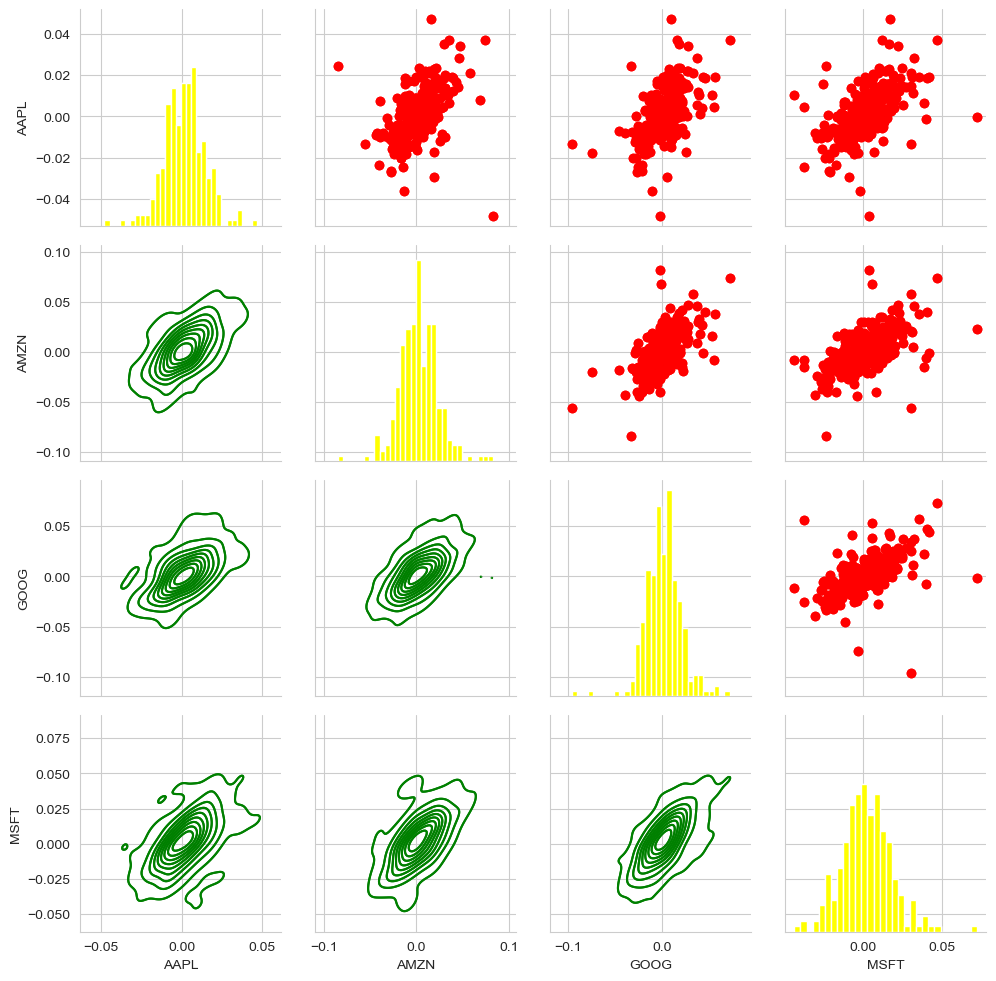

In [21]:
eturns_fig=sns.PairGrid(data=closing_df.dropna())#this forms pair of grid 
returns_fig.map_upper(plt.scatter,color='red')#upper trisngle has scatter plot
returns_fig.map_diag(plt.hist,bins=30,color='yellow')#diagonal has histogram
returns_fig.map_lower(sns.kdeplot,color='green')#lower triangle has kdeplot
plt.show()

In [62]:
rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(x=rets.mean(),y=rets.std(),s=area)
plt.xlabel("expecter return")
plt.ylabel("risk")


Text(0, 0.5, 'risk')

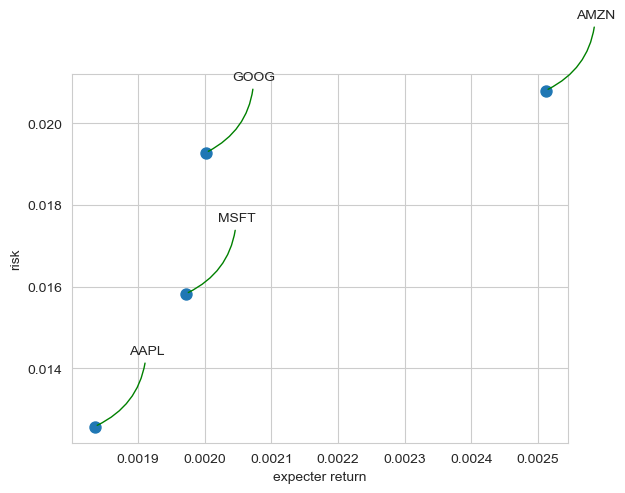

In [64]:
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,  # Text label
        xy=(x, y),  # Coordinates
        xytext=(50, 50),  # Offset position
        textcoords='offset points',
        ha='right', 
        va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3',color='green')  # Arrow style
    )


plt.show()
#below graph shows that that ammazon stock is the riskiest and the safest is apple stock it has low return and low risk
#this is how u basically analyse the risk in the begineer stage

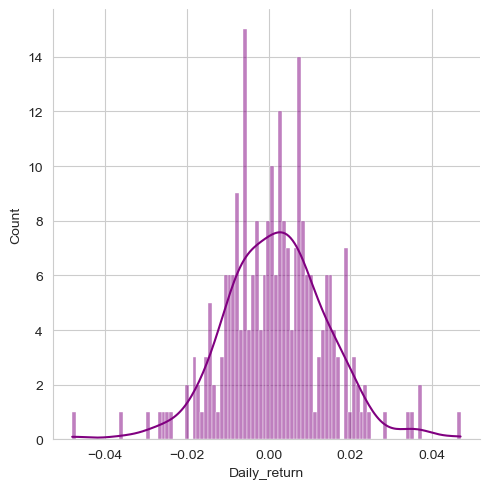

In [66]:
#boot strap method of risk analysis
sns.displot(data['Daily_return'].dropna(),bins=100,color='purple',kde=True)
plt.show()


In [68]:
rets['AAPL'].quantile(0.05)
#what this means is that on any day with 95% confidence interval our worst daily loss will not exceed 1.7% of the principal value

-0.017176403369176363

In [82]:
#monte carlo method for risk analysis and stock prediction
days=200
delt=1/days
mu=rets.mean()['AMZN']
sigma=rets.std()['AMZN']


In [84]:
def montecarlo(start_price,days,mu,sigma):
    price=np.zeros(days)#this set all the 200 value into 0 in the array the 200 value comes from the days
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*delt,scale=sigma*np.sqrt(delt))#here loc means the mean of a normal distribution and scale is the standard deviation of the distribution or the spread of the distribution.
        drift[x]=mu*delt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))

    return price


        






In [94]:
data['Open']['AMZN'].head()

Date
2023-01-03    85.459999
2023-01-04    86.550003
2023-01-05    85.330002
2023-01-06    83.029999
2023-01-09    87.459999
Name: AMZN, dtype: float64

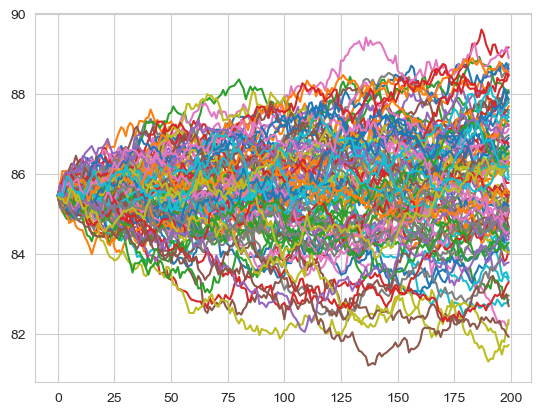

<Figure size 2000x1000 with 0 Axes>

In [110]:
start_price=85.459999
for run in range(100):
    plt.plot(montecarlo(start_price,days,mu,sigma))

plt.xlabel="days"
plt.ylabel="price"
plt.title="monte carlo analysis for amazon"
plt.figure(figsize=(20,10))
plt.show()


In [104]:
runs=10000
stimulation=np.zeros(runs)
for run in range(runs):
    stimulation[run]=montecarlo(start_price,days,mu,sigma)[days-1]
    


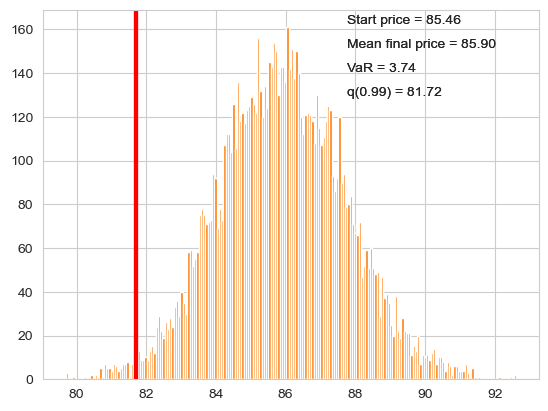

In [122]:
q=np.percentile(stimulation,1)#99% of thw value should within our output
plt.hist(stimulation,bins=200)
plt.figtext(0.6, 0.85, f"Start price = {start_price:.2f}")
plt.figtext(0.6, 0.80, f"Mean final price = {stimulation.mean():.2f}")
plt.figtext(0.6, 0.75, f"VaR = {start_price - q:.2f}")
plt.figtext(0.6, 0.70, f"q(0.99) = {q:.2f}")

# Vertical line for q value
plt.axvline(x=q, linewidth=3, color='red')
plt.show()
#most amount of money u can loose is 3.74 dollors(value at risk)[var]